# HW 12

## Q1

As an exercise, let
\begin{align*}
    x = \begin{bmatrix}
            1 \\ 2 \\ 3
        \end{bmatrix}, \quad 
    y = \begin{bmatrix}
            3\\ 2 \\ 1
        \end{bmatrix}.
\end{align*}
Answer the following questions.

(a) Using $\mathbb{R}^3_+$, is it true that $x \succeq_{\mathbb{R}^3_+} y$? Explain why. Plot $x-y$ and $\mathbb{R}^3_+$.
    
(b) Using $\mathbb{L}^3$, is it true that $x\succeq_{\mathbb{L}^3} y$? Explain why. Plot $x-y$ and $\mathbb{L}^3$. 
    
(c) Now define three matrices 
    \begin{align*}
        A = \begin{bmatrix}
            -6 & 7 & 8 \\ 7 & -8 & 9 \\ 8 & 9 & -10
        \end{bmatrix}, \quad 
        B = \begin{bmatrix}
            0 & 1 & 2 \\ 1 & 2 & 3 \\ 2 & 3 & 4
        \end{bmatrix}, \quad
        C = \begin{bmatrix}
            -10 & 9 & 8 \\ 9 & -8 & 7 \\ 8 & 7 & -12            \end{bmatrix}.
    \end{align*}

Is it true that $A\preceq_{\mathbb{S}^3_+} B$? Is it true that $A \succeq_{\mathbb{S}^3_+} C$? Explain why. Remember A real symmetric matrix is positive semidefinite if and only if all of its eigenvalues are nonnegative.


## Solution Q1.2

False, since the first component is less than zero:

\begin{equation}
x-y=\left[\begin{array}{r}
1-3 \\
2-2 \\
3-1
\end{array}\right]=\left[\begin{array}{r}
-2 \\
0 \\
2
\end{array}\right]
\end{equation}

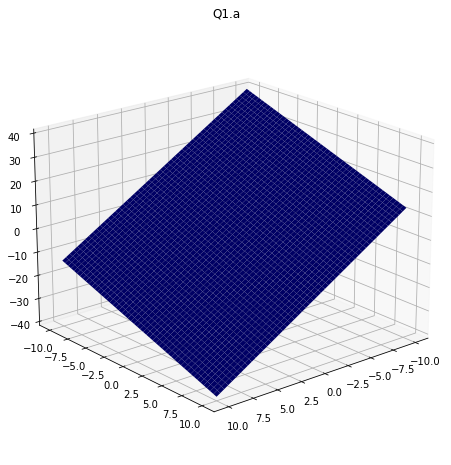

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig_1, ax_1 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))
fig_1.patch.set_facecolor("xkcd:white")

d = np.linspace(-10, 10, 1000)
x, y = np.meshgrid(d, d)

z1 = (x + 2 * y) / 3
z2 = (3 * x + 2 * y)


ax_1.plot_surface(x, y, z1-z2, color="blue", vmax=20)
ax_1.view_init(20, 50)
ax_1.set_title("Q1.a")

plt.show()

## Solution Q1.b
True. Using the Second Order Cone:

\begin{equation}
\begin{gathered}
\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}} \leq x_{3}-y_{3} \\
\sqrt{(-2)^{2}+(0)^{2}} \leq 2 \\
2 \leq 2
\end{gathered}
\end{equation}

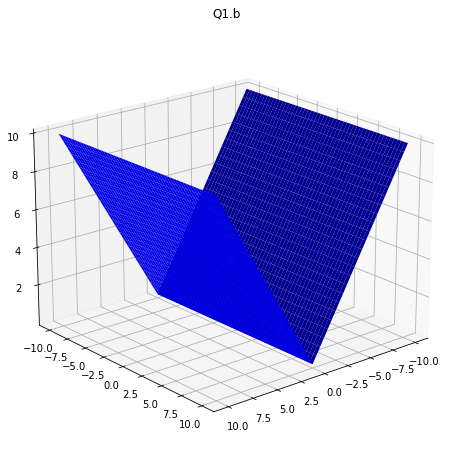

In [3]:
fig_2, ax_2 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))
fig_2.patch.set_facecolor("xkcd:white")

z = np.sqrt((-2 * x) ** 2) / 2

ax_2.plot_surface(x, y, z, color="blue")
ax_2.view_init(20, 50)
ax_2.set_title("Q1.b")

plt.show()

## Solution Q1.c

- $A\preceq_{\mathbb{S}^3_+} B$ ?

$$
B - A \succeq_{\mathbb{S}^3_+} 0 \\
\begin{bmatrix}
0 & 1 & 2 \\ 1 & 2 & 3 \\ 2 & 3 & 4
\end{bmatrix}- 
\begin{bmatrix}
-6 & 7 & 8 \\ 7 & -8 & 9 \\ 8 & 9 & -10
\end{bmatrix} 
\succeq_{\mathbb{S}^3_+} 0 \\
\begin{bmatrix}
6 & -6 & -6 \\ -6 & 10 & -6 \\ -6 & -6 & 14 
\end{bmatrix} \succeq_{\mathbb{S}^3_+} 0
$$

Next, let's calculate the eigen values from the matrix above

In [4]:
import array_to_latex as a2l
from IPython.display import display, Markdown

A_1 = np.array([
    [6, -6, -6],
    [-6, 10, -6],
    [-6, -6, 14]
])

eig_vals_1 = np.linalg.eigvals(A_1)
display(Markdown(a2l.to_ltx(eig_vals_1, print_out=False)))


\begin{bmatrix}
 -2.58 &  14.00 &  18.58
\end{bmatrix}

Since not all the eigenvalues are positive, the matrix is not positive-semidefinite. Hence, $A\preceq_{\mathbb{S}^3_+} B$ is **False**

- $A \succeq_{\mathbb{S}^3_+} C$ ?

$$
A - C \succeq_{\mathbb{S}^3_+} 0 \\
\begin{bmatrix}
-6 & 7 & 8 \\ 7 & -8 & 9 \\ 8 & 9 & -10
\end{bmatrix} -
\begin{bmatrix}
-10 & 9 & 8 \\ 9 & -8 & 7 \\ 8 & 7 & -12
\end{bmatrix}
\succeq_{\mathbb{S}^3_+} 0 \\
\begin{bmatrix}
4 & -2 & 0 \\ -2 & 0 & 2 \\ 0 & 2 & 2 
\end{bmatrix} \succeq_{\mathbb{S}^3_+} 0
$$

In [5]:
A_2 = np.array([
    [4, -2, 0],
    [-2, 0, 2],
    [0, 2, 2]
])

eig_vals_2 = np.linalg.eigvals(A_2)
display(Markdown(a2l.to_ltx(eig_vals_2, print_out=False)))

\begin{bmatrix}
 -1.76 &  5.06 &  2.69
\end{bmatrix}

Since not all the eigenvalues are positive, the matrix is not positive-semidefinite. Hence, $A\succeq_{\mathbb{S}^3_+} C$ is **False**

## Solution Q2

$\min \max \|u-w\|$

Using the epigraph reformulation we have:

$\min t$
s.t $\max\|u-w\| \leq t$

Since the maximum of the SOCs is the same as testing the inequality for all $i$, we have:

$\min t$
s.t $\left\|u_{i}-w\right\| \leq t, \quad \forall_{i}=1, m$

$u$ is the matrix of the location of the villages, while $w$ is the location of the fire station. The objective is to minimize $t$ with the defined constraints.

In [43]:
import cvxpy as cp

n = 20  # Number of villages
u = np.random.rand(n, 2) * 10  # Creation of villages matrix
w = cp.Variable(2)  # The fire station variable
t = cp.Variable()  # The maximum distance to minimize from the epigraph reformulation

soc_constraints = [
      cp.SOC(t, u[i] - w) for i in range(n)
]

prob = cp.Problem(cp.Minimize(t),
                  soc_constraints + [t >= 0])
prob.solve()

max_dist = round(prob.value, 2)

print("The max distance to be minimized from the villages to the fire station is:", max_dist)
print("The fire station is located at point:", w.value)

The max distance to be minimized from the villages to the fire station is: 5.88
The fire station is located at point: [5.31286705 4.70636214]


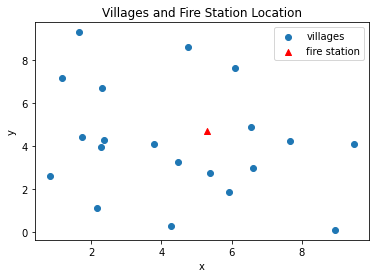

In [44]:
plt.scatter(u[:, 0], u[:, 1], label="villages")
plt.scatter(w.value[0], w.value[1], color="r", label="fire station", marker="^")
plt.title("Villages and Fire Station Location")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()